In [20]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import RFECV
import pandas_profiling as pp
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('Brain Tumor.csv')
data = dataset.values

df = pd.DataFrame(dataset)

x = data[:, :14]
y = data[:, 1]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3762, 15)
Dimensionalitat de les entrades X (3762, 14)
Dimensionalitat de l'atribut Y (3762,)


In [22]:
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982,0.000
1,Image2,0,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989,0.000
2,Image3,1,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978,0.000
3,Image4,1,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964,0.000
4,Image5,0,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.235,1208.850,34.769,0.064,2.082,4.647,158.438,0.221,0.049,0.487,5.212,0.951,0.000
3758,Image3759,0,20.435,1227.151,35.031,0.067,2.145,4.882,161.159,0.226,0.051,0.503,5.083,0.953,0.000
3759,Image3760,0,18.012,1151.583,33.935,0.068,2.308,5.579,167.130,0.229,0.052,0.492,5.104,0.952,0.000
3760,Image3761,0,13.330,945.733,30.753,0.088,2.733,7.758,223.813,0.262,0.068,0.480,6.440,0.941,0.000


0 = NO TUMOR  
1 = TUMOR

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [24]:
print("Per comptar el nombre de valors no existents:")
print(df.isnull().sum())

Per comptar el nombre de valors no existents:
Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


In [25]:
new_df= df.drop(['Coarseness'],axis=1)
new_df= new_df.drop(['Image'],axis=1)
new_df['Class'] = new_df['Class'].astype(float)
new_df.head()



,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,0.000,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982
1,0.000,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989
2,1.000,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978
3,1.000,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964
4,0.000,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973


In [26]:
def normalize_df(df):
    return((df-df.min())/(df.max()-df.min()))
dataset = normalize_df(new_df)

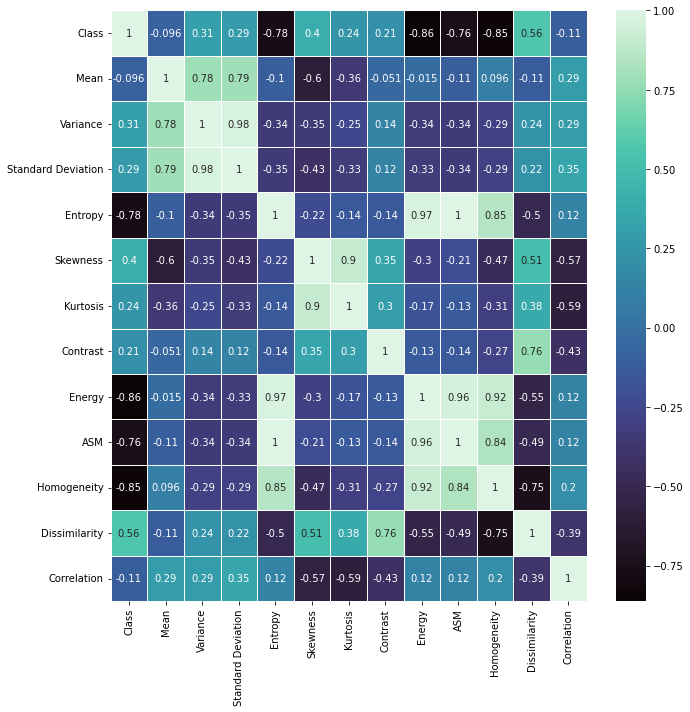

In [27]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlacio, annot=True, linewidths=.5, ax=ax, cmap="mako")

fig.tight_layout()

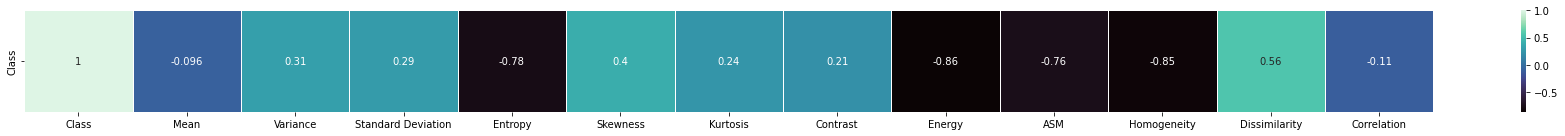

In [28]:
tumor = dataset.corr()['Class'].to_frame().T
fig, ax = plt.subplots(figsize=(25,2))         # Sample figsize in inches
sns.heatmap(tumor, annot=True, linewidths=.5, ax=ax, cmap="mako")

fig.tight_layout()


In [29]:
correlation_threshold = 0.25
attributes  = list(filter(lambda x: abs(float(dataset.corr()['Class'].to_frame().T[x])) > correlation_threshold, dataset.columns))
attributes.remove('Class')
corrTbl = PrettyTable()
corrTbl.field_names = ['Atribut']
for i in range(len(attributes)): 
    corrTbl.add_row([attributes[i]])
print(corrTbl)

+--------------------+
|      Atribut       |
+--------------------+
|      Variance      |
| Standard Deviation |
|      Entropy       |
|      Skewness      |
|       Energy       |
|        ASM         |
|    Homogeneity     |
|   Dissimilarity    |
+--------------------+


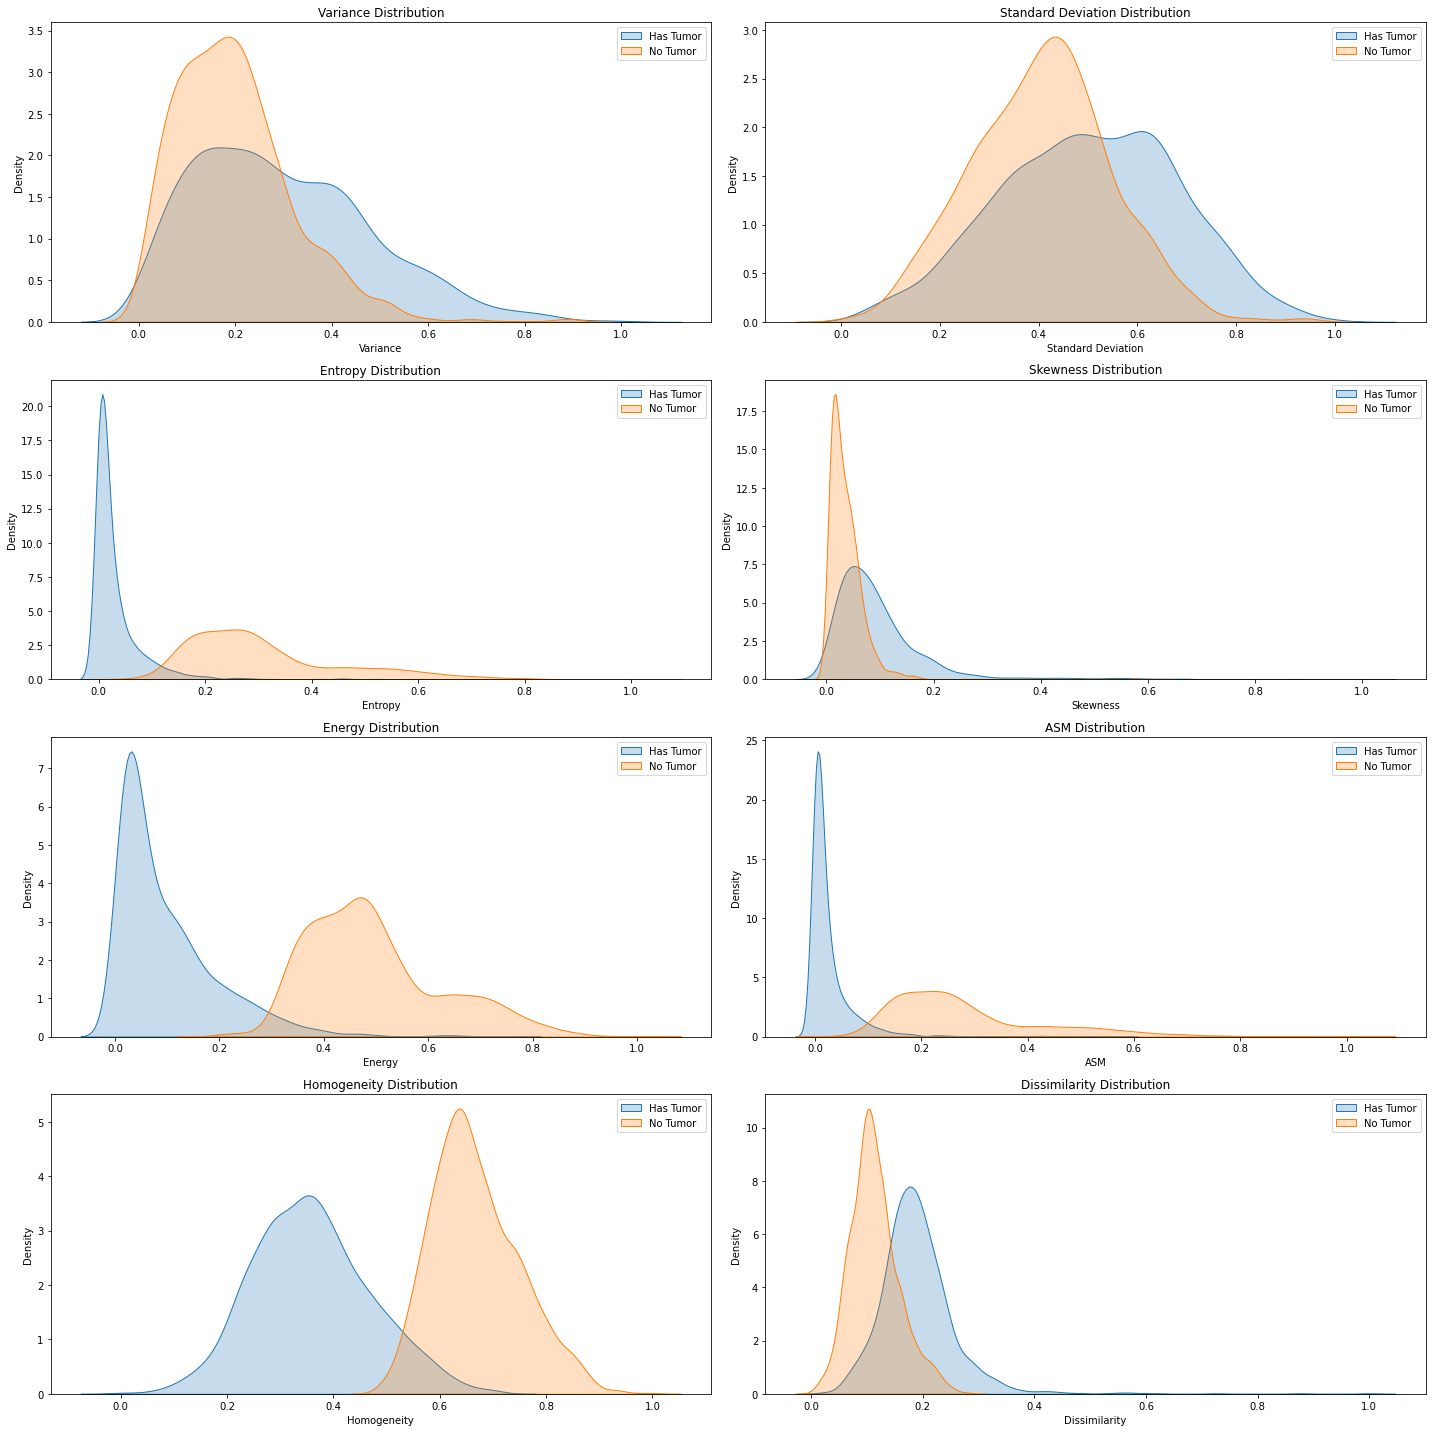

In [30]:
tumor = dataset[dataset['Class']==1]
no_tumor = dataset[dataset['Class']==0]
fig, axes = plt.subplots(4,2, figsize=(20,20))
ax = axes.ravel()

for i in range(len(attributes)): 
    ax[i].set_title(f'{attributes[i]} Distribution')
    if (i==0):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[0,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[0,0])
    elif(i==1):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[0,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[0,1])
    elif(i==2):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[1,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[1,0])
    elif(i==3):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[1,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[1,1])
    elif i==4:
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[2,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[2,0])
    elif i==5:        
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[2,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[2,1])
    elif i==6:    
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[3,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[3,0])
    elif i==7:
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[3,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[3,1])
    ax[i].legend(["Has Tumor", "No Tumor"], loc="best")
fig.tight_layout()
fig.savefig('distribution.png')
attributes.append('Class')

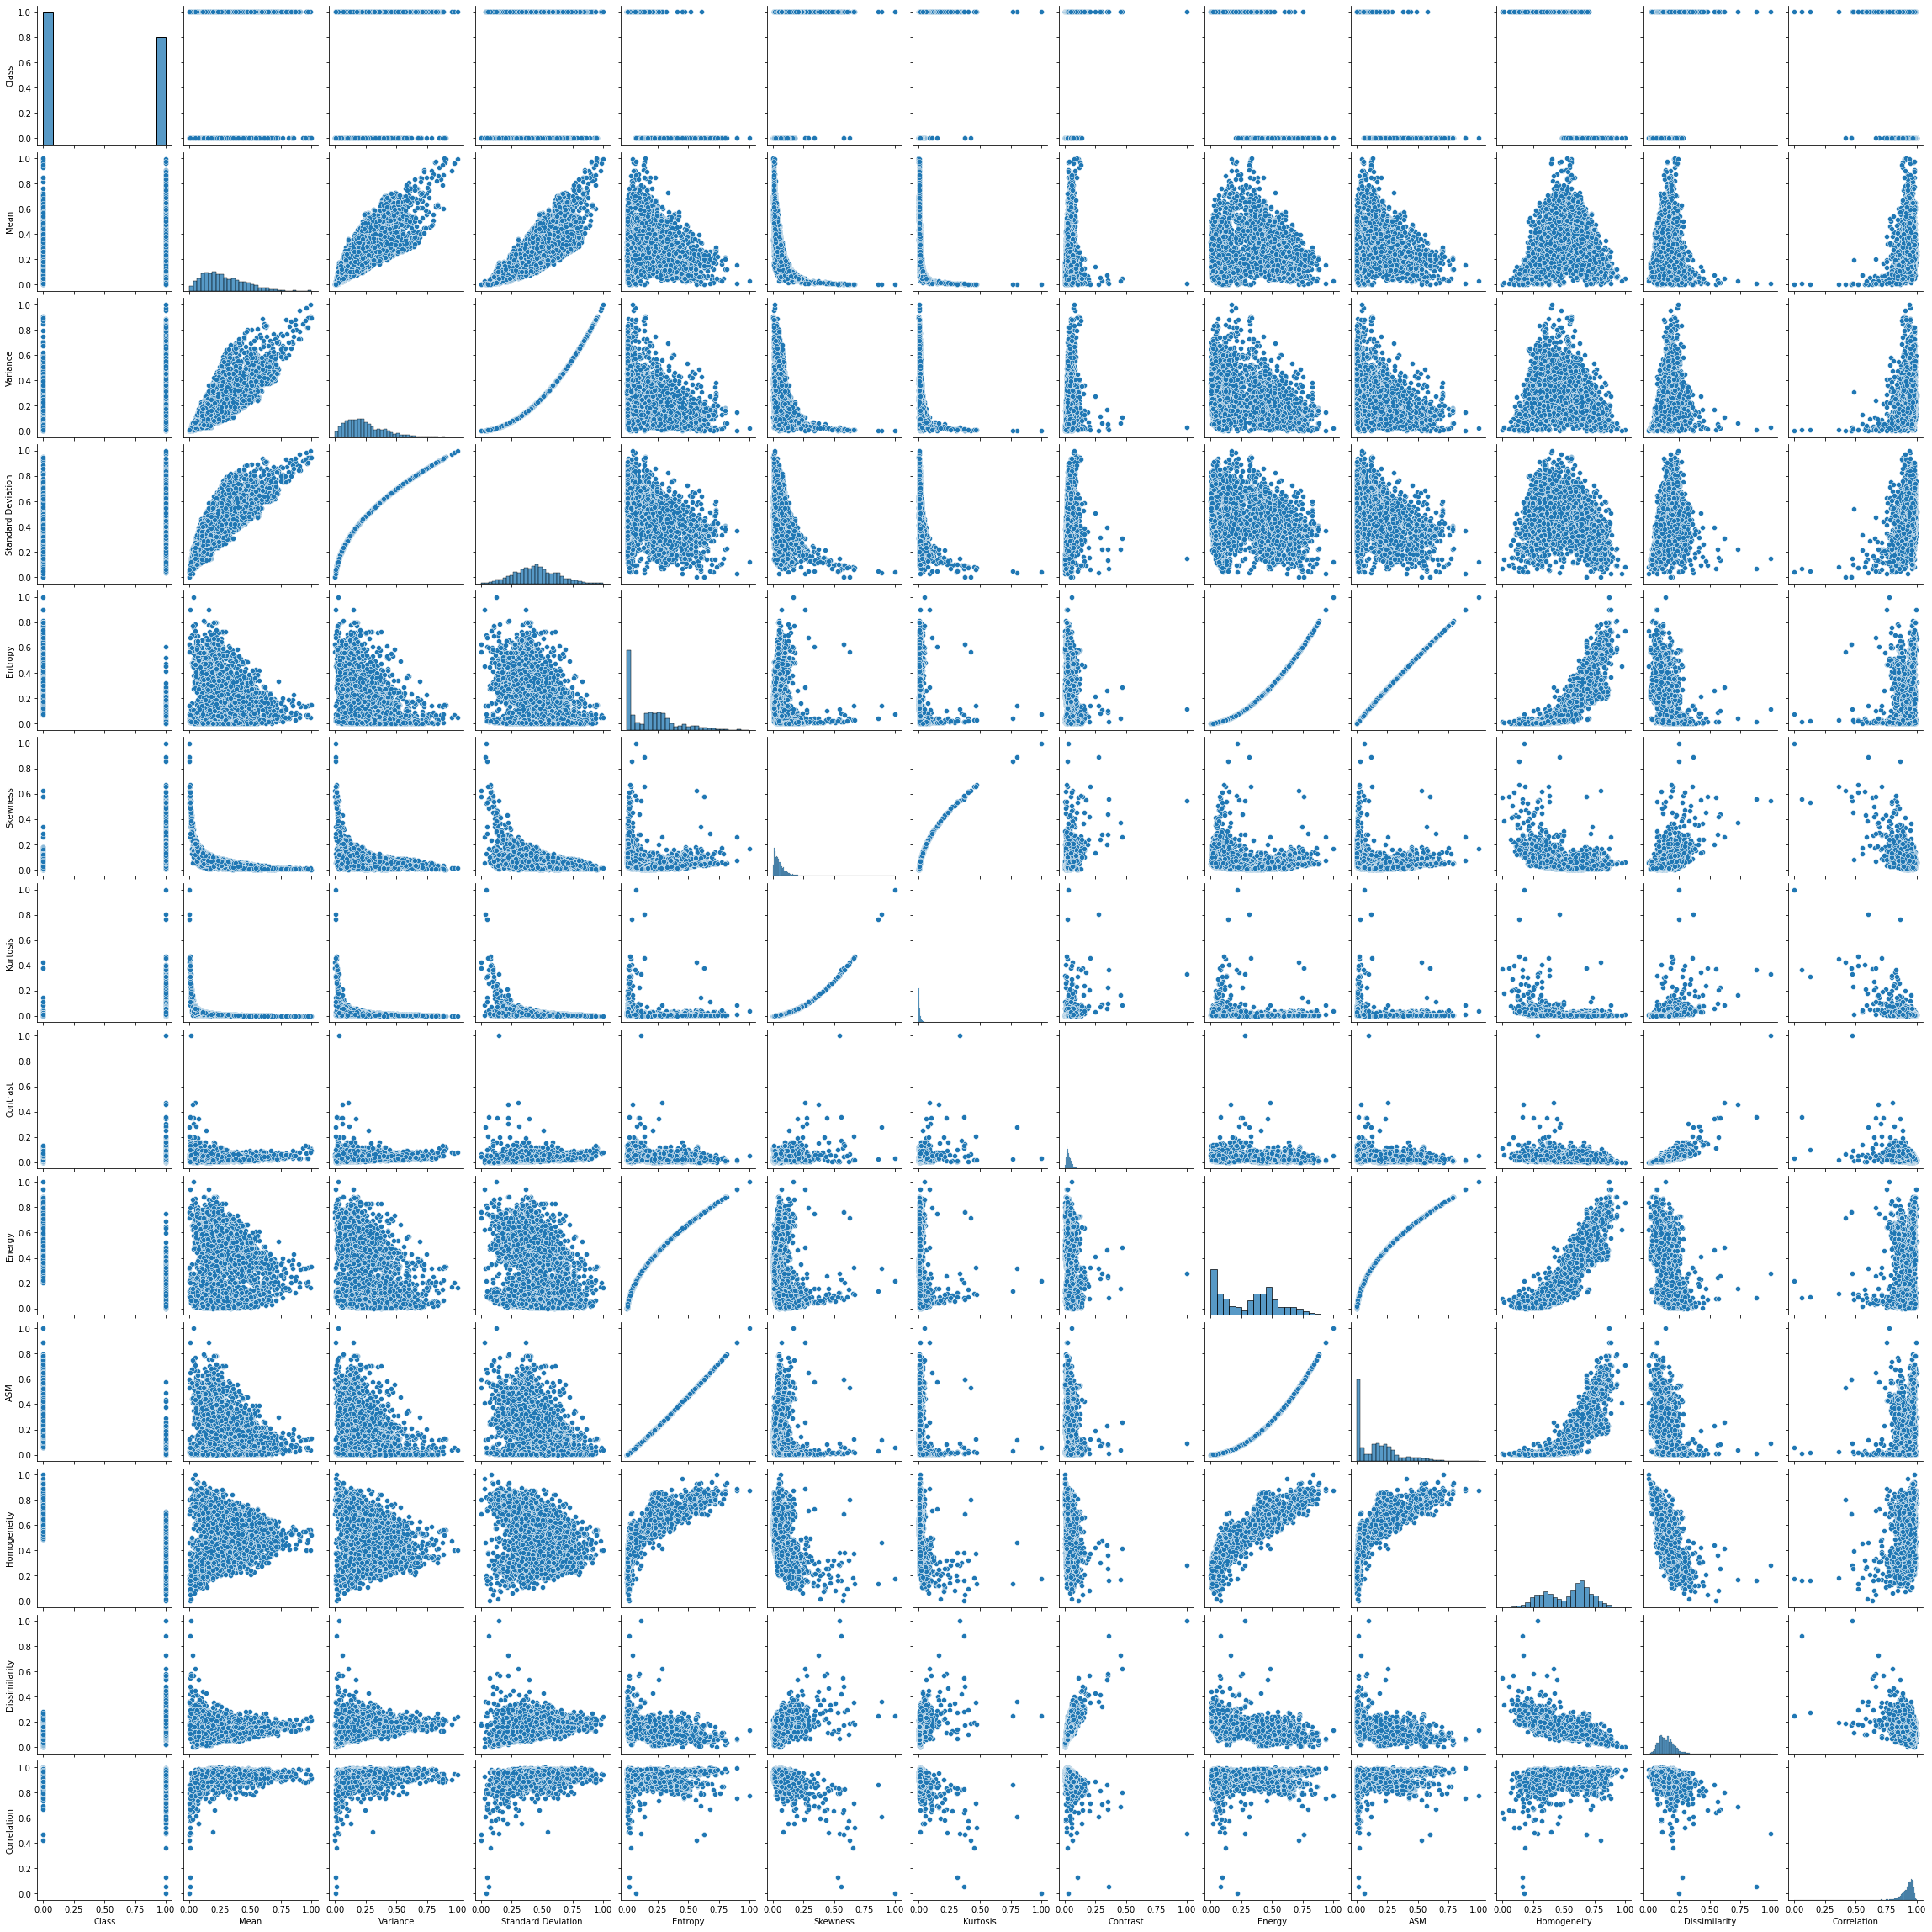

In [31]:
relacio = sns.pairplot(dataset)

In [32]:
attributes_df = dataset.loc[:,attributes]
attributes_df.describe()

,Variance,Standard Deviation,Entropy,Skewness,Energy,ASM,Homogeneity,Dissimilarity,Class
count,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000
mean,0.243,0.449,0.185,0.063,0.319,0.167,0.530,0.148,0.447
std,0.161,0.168,0.179,0.073,0.229,0.168,0.181,0.068,0.497
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.124,0.331,0.015,0.021,0.079,0.012,0.368,0.101,0.000
50%,0.213,0.444,0.167,0.044,0.355,0.145,0.577,0.140,0.000
75%,0.331,0.562,0.286,0.079,0.485,0.256,0.666,0.186,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [33]:
#Data standarization and plotting information related to values
standarized_df = (attributes_df - attributes_df.mean()) / (attributes_df.std()) 

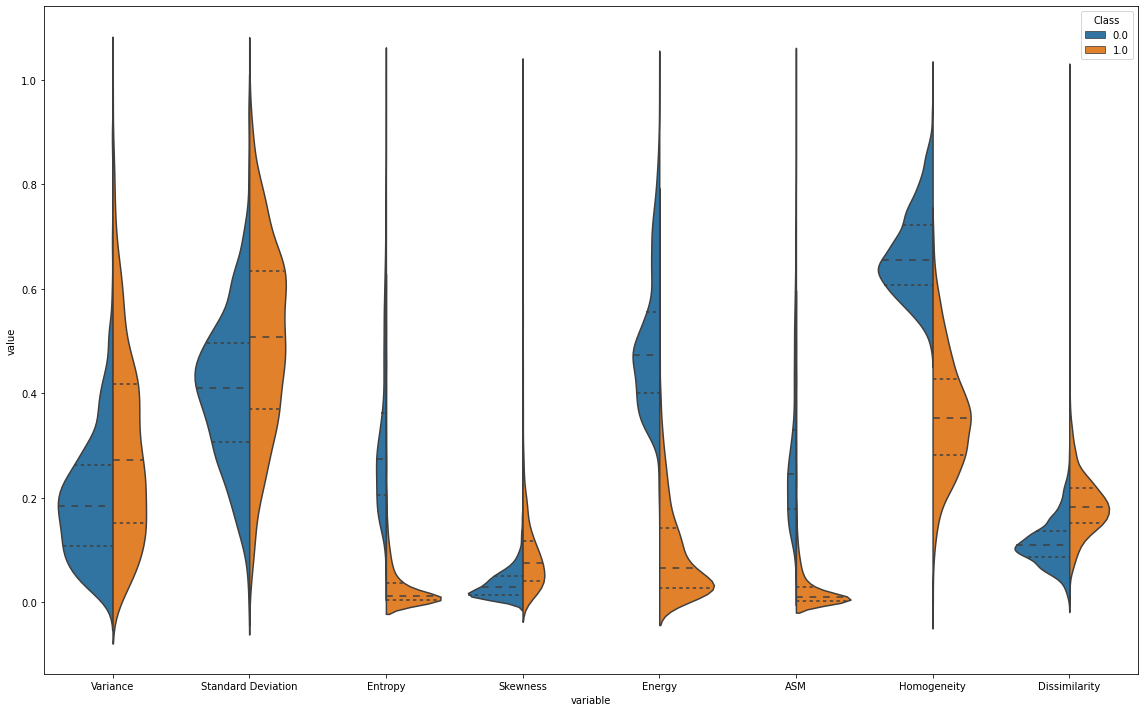

In [34]:
tumor_rel = dataset.Class
melted_data = pd.melt(attributes_df, id_vars = "Class")
plt.figure(figsize = (16,10))
sns.violinplot(x = "variable", y = "value", hue="Class", data = melted_data, split=True, inner="quartile")
plt.tight_layout()

In [35]:
variables = ["Entropy", "Energy", "ASM", "Homogeneity", "Dissimilarity"]
variablesIndex=[]
for i in range(len(variables)):
    variablesIndex.append(dataset.columns.get_loc(variables[i]))
variablesIndex

[4, 8, 9, 10, 11]

In [38]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr
def Logisticregression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LogisticRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

In [39]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.


predicted = []
for j,i in enumerate(variablesIndex):
    atribut2 = x[:,i].reshape(x.shape[0], 1) 
    regr = regression(atribut2, y) 
    predicted.append(regr.predict(atribut2))

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
# Mostrem l'error (MSE i R2)
for i in range(4):
    MSE = mse(y, predicted[i])
    r2 = r2_score(y, predicted[i])

    print("Mean squeared error attribute %s: %f" %(dataset.axes[1][variablesIndex[i]],MSE))
    print("R2 score: attribute %s: %f" %(dataset.axes[1][variablesIndex[i]],r2))
#accuracy multiple
i = 0
for pred in predicted:
    correcte = 0
    incorrecte = 0
    for labels,p in zip(y,pred):
        if((labels == 0 and p<0.5) or (labels == 1 and p>=0.5)):
            correcte +=1
        else:
            incorrecte +=1
    print("Fent servir l'atribut",dataset.axes[1][variablesIndex[i]],"obtenim un accuracy de",correcte/len(pred))
    i +=1


Mean squeared error attribute Entropy: 0.227068
R2 score: attribute Entropy: 0.081549
Mean squeared error attribute Energy: 0.236051
R2 score: attribute Energy: 0.045217
Mean squeared error attribute ASM: 0.063351
R2 score: attribute ASM: 0.743756
Mean squeared error attribute Homogeneity: 0.105085
R2 score: attribute Homogeneity: 0.574950
Fent servir l'atribut Entropy obtenim un accuracy de 0.652046783625731
Fent servir l'atribut Energy obtenim un accuracy de 0.5930356193514088
Fent servir l'atribut ASM obtenim un accuracy de 0.9731525784157363
Fent servir l'atribut Homogeneity obtenim un accuracy de 0.9292929292929293
Fent servir l'atribut Dissimilarity obtenim un accuracy de 0.9481658692185008


In [40]:
attributes.remove('Class')
y = dataset.iloc[:,0]
X = dataset.loc[:,attributes]

In [41]:
dataset.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,0.000,0.195,0.212,0.443,0.275,0.068,0.011,0.028,0.475,0.246,0.603,0.140,0.982
1,0.000,0.261,0.276,0.510,0.675,0.052,0.008,0.018,0.797,0.648,0.774,0.094,0.997
2,1.000,0.219,0.392,0.614,0.001,0.091,0.016,0.023,0.013,0.001,0.231,0.195,0.973
3,1.000,0.177,0.329,0.560,0.002,0.108,0.022,0.044,0.013,0.001,0.196,0.259,0.941
4,0.000,0.218,0.250,0.484,0.371,0.068,0.011,0.051,0.565,0.339,0.561,0.227,0.961


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [43]:
from sklearn.neural_network import MLPClassifier
import time

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
          AdaBoostClassifier(), xgb.XGBClassifier(), MLPClassifier()]
model_names = ["Logistic", "Decision Tree", "Random Forest", "Ada Boost", "XGBoost", "Neural Network"]
idx= 0
tbl = PrettyTable()
tbl.field_names = ['Model', 'Accuracy', 'Temps']
for m in models: 
    start = time.time()
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    end = time.time()
    tbl.add_row([model_names[idx], score, end-start])
    #print(f"Utilitzant el model {model_names[idx]} obtenim una accuracy de: {m.score(X_train,y_train)}")
    idx+=1

print(tbl)

[15:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
+----------------+--------------------+----------------------+
|     Model      |      Accuracy      |        Temps         |
+----------------+--------------------+----------------------+
|    Logistic    | 0.9743135518157662 | 0.01298666000366211  |
| Decision Tree  | 0.9796279893711249 | 0.021052122116088867 |
| Random Forest  | 0.9858281665190434 |  0.4339470863342285  |
|   Ada Boost    | 0.9867139061116031 |  0.2600524425506592  |
|    XGBoost     | 0.9884853852967228 |  0.7571947574615479  |
| Neural Network | 0.9778565101860053 |  2.6590001583099365  |
+----------------+--------------------+----------------------+


In [44]:
#Models diversos de SVM
from sklearn import svm
svm_models= [svm.SVC(kernel='linear', C=10, random_state=123),
              svm.LinearSVC(C=10, max_iter=1000000,random_state=123),
              svm.SVC(kernel='rbf',  C=10,random_state=123),
              svm.SVC(kernel='poly',degree=4, C=10,random_state=123),
              svm.SVC(kernel='sigmoid', C=10,random_state=123)]
svm_kernels = ["Linear","SVC Linear", "RBF", "Polyniomical", "Sigmoid"]
idx= 0
svmtbl = PrettyTable()
svmtbl.field_names = ['Model', 'Accuracy', 'Temps']
for svm in svm_models:
    start =  time.time()
    svm.fit(X_train, y_train)
    score = svm.score(X_train,y_train)
    end = time.time()
    svmtbl.add_row([svm_kernels[idx], score, end-start])
    #print(f"Utilitzant el kernel {svm_kernels[idx]} obtenim una accuracy de: {svm.score(X_train,y_train)}")
    idx+=1
print(svmtbl)

+--------------+--------------------+----------------------+
|    Model     |      Accuracy      |        Temps         |
+--------------+--------------------+----------------------+
|    Linear    | 0.9821496391948348 | 0.06299829483032227  |
|  SVC Linear  | 0.9813900493733384 | 0.021999120712280273 |
|     RBF      | 0.9863273832130649 | 0.10700082778930664  |
| Polyniomical | 0.9897455374097988 | 0.12905192375183105  |
|   Sigmoid    | 0.5457652867451576 |  0.5639498233795166  |
+--------------+--------------------+----------------------+


In [45]:
#We will train our model with different parameters and the best "combination" will be selected
from sklearn import svm
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

SVC(C=10)


In [46]:
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,clf.predict(X_test)),
          recall_score(y_test, clf.predict(X_test)), f1_score(y_test, clf.predict(X_test))])
print(ptbl)

+--------------------+--------------------+--------------------+
|      Accuracy      |       Recall       |      F1Score       |
+--------------------+--------------------+--------------------+
| 0.9840566873339238 | 0.9763313609467456 | 0.9821428571428571 |
+--------------------+--------------------+--------------------+


Text(33.0, 0.5, 'True Value')

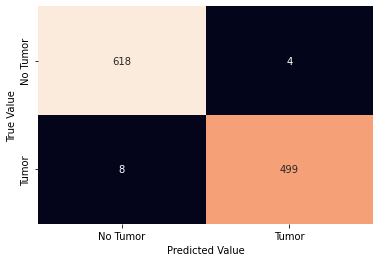

In [47]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics
%matplotlib inline
label_aux = plt.subplot()
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
cm_rf = confusion_matrix(y_test,rf_prediction)
cm_rf_m = pd.DataFrame(cm_rf, index = ["No Tumor","Tumor"], columns = ["No Tumor",'Tumor'])
sns.heatmap(cm_rf_m,annot=True,fmt="d", cbar=False)
label_aux.set_xlabel('Predicted Value');label_aux.set_ylabel('True Value')


In [48]:
###ANALITZEM IMATGES

In [63]:
!pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=ddc8007bb5687697ee8c98502aeb6bb2cf3035cd178e187c14045a98684f79b4
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [66]:
!pip install opencv-python

In [67]:
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D, Flatten, Dense, Conv2D, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD

# لخلط البيانات 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL.Image import open

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [68]:
DATASET_IMAGE = "F:/Biblioteca/Documents/UAB/3r/Aprenentatge Computacional/CasKaggle/Brain Tumor"
IMAGE_RAW = r"F:\Biblioteca\Documents\UAB\3r\Aprenentatge Computacional\CasKaggle\Brain Tumor"

HEIGHT = 224
WIDTH = 224
EPOCHS = 50

In [69]:
file = os.listdir(DATASET_IMAGE)

In [70]:
plt.figure(figsize=(20,20))
test_folder="F:/Biblioteca/Documents/UAB/3r/Aprenentatge Computacional/CasKaggle/Brain Tumor/Image3202.jpg" 
img=mpimg.imread(test_folder)
print(img.size)

172800


<Figure size 1440x1440 with 0 Axes>